In [1]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [32]:
### Load Graphs
data_base_path = "Data/"

# G_actor = nx.read_gml(data_base_path + "graph_actors.gml")
G_amazon = nx.read_gml(data_base_path + "graph_amazon.gml")
G_escort = nx.read_gml(data_base_path + "graph_escort.gml")
G_internet = nx.read_gml(data_base_path + "graph_internet.gml")

### A05.01

In [73]:
# import collections
import powerlaw
from scipy.special import factorial
from scipy.stats import poisson, expon
import decimal

figure_index = 100
def new_figure():
    global figure_index
    plt.figure(figure_index)

def superimpose_degree_distribution(G:nx.Graph):
    degrees = G.degree()
    degree_array=[degrees[i] for i in G.nodes()]

    powerlaw.plot_pdf(degree_array, color='b', label="True degree distrubution",linestyle="--")


def superimpose_powerlaw(G:nx.Graph):
    degrees = G.degree()
    degree_array=[degrees[i] for i in G.nodes()]
    pl = powerlaw.Fit(degree_array)
    alpha = pl.power_law.alpha
    print("alpha:  "+str(alpha))
    print("error: " + str(pl.power_law.sigma))

    pl.power_law.plot_pdf(color='b', label="Theoretical power law")

    spacing = np.linspace(min(degree_array),max(degree_array),len(degree_array))
    degree_x_na_alpha = spacing**(-1*alpha)
    plt.plot(spacing, degree_x_na_alpha, label = "power law: p(k)=k^(-alpha)", color="r")

def poisson_p(k, lamda):
    # return decimal.Decimal(decimal.Decimal(lamda**k) / decimal.Decimal(factorial(k, exact=True)) * decimal.Decimal(np.exp(decimal.Decimal(-1*lamda))))
    return poisson.pmf(k, lamda)
def exponential_p(k, lamda):
    # return lamda**(-1)*np.exp(-k/lamda)
    return expon.pdf(k,scale = lamda )

def superimpose_exponential(G:nx.Graph, lamda):
    degrees = G.degree()
    degree_array = [degrees[i] for i in G.nodes()]
    degree_set = set(degree_array)
    degree_set = np.sort(list(degree_set))
    x_y =[(d, exponential_p(d, lamda)) for d in degree_set]
    x_y = np.asarray(x_y)
    x = x_y[:,0]
    y = x_y[:,1]
    plt.plot(x, y, label="exponential p", color="orange")

def superimpose_poisson(G:nx.Graph, lamda):
    degrees = G.degree()
    degree_array = [degrees[i] for i in G.nodes()]
    degree_set = set(degree_array)
    degree_set = np.sort(list(degree_set))
    x_y =[(d, poisson_p(d, lamda)) for d in degree_set]
    x_y = np.asarray(x_y)
    x = x_y[:,0]
    y = x_y[:,1]
    plt.plot(x, y, label="poisson p", color="g")

def plot_distribution(G:nx.Graph):
    degrees = G.degree()
    degree_array=[degrees[i] for i in G.nodes()]
    avg_k = np.mean(degree_array)

    new_figure()

    superimpose_degree_distribution(G)
    superimpose_exponential(G, avg_k)
    superimpose_powerlaw(G)
    superimpose_poisson(G, avg_k)

    plt.legend(bbox_to_anchor=(1.6, 0.5))
    # plt.axvline(x=avg_k, color='g', label='<k>')

#### Amazon

Calculating best minimal value for power law fit
alpha:  4.065660034466614
error: 0.09699319113242895


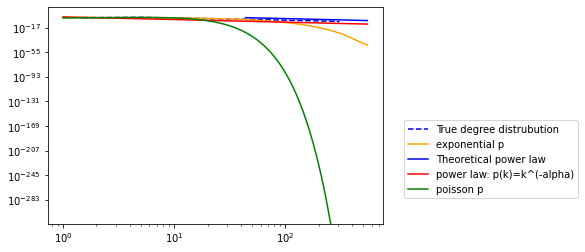

In [74]:
plot_distribution(G_amazon)

#### escort

Calculating best minimal value for power law fit
alpha:  2.9544249080995764
error: 0.07919729392592209


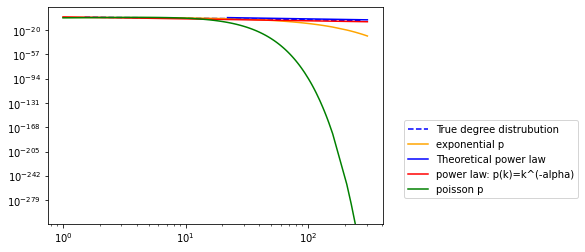

In [75]:
plot_distribution(G_escort)

#### internet

Calculating best minimal value for power law fit
alpha:  2.112191339113011
error: 0.0366878070312722


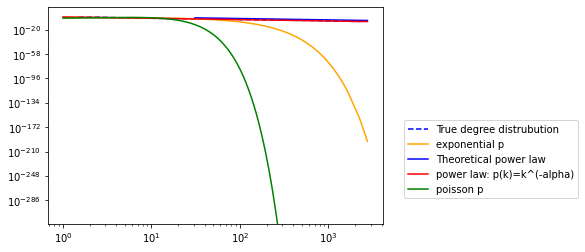

In [76]:
plot_distribution(G_internet)

#### A05.01 - 3



### A05.02

In [ ]:
#task 2 

m = 3
N = [50, 100, 500, 1000, 5000]
list_avg_cluster_coefficient = []
list_rnd_avg_cluster_coefficient = []
list_assortativity = []
list_rnd_assortativity = []
list_avg_shortest_path = []
list_rnd_avg_shortest_path = []
list_diameter = []
list_rnd_diameter = []

for i in range(0, len(N)):
    G = nx.barabasi_albert_graph(N[i], m)
    G_rnd = nx.algorithms.smallworld.random_reference(G)
    
    avg_cluster_coefficient = nx.average_clustering(G)
    avg_cluster_coefficient_rnd = nx.average_clustering(G_rnd)
    list_avg_cluster_coefficient.append(avg_cluster_coefficient)
    list_rnd_avg_cluster_coefficient.append(avg_cluster_coefficient_rnd)
    print("Average assortativity coefficient for N =", N[i] ,"is: " + str(round(avg_cluster_coefficient, 4)))
    print("Average assortativity coefficient for randomized network of N =", N[i] ,"is: "+ str(round(avg_cluster_coefficient_rnd, 4)))
    
    assortativity = nx.degree_assortativity_coefficient(G)
    assortativity_rnd = nx.degree_assortativity_coefficient(G_rnd)
    list_assortativity.append(assortativity)
    list_rnd_assortativity.append(assortativity_rnd)
    print("Assortativity for N =", N[i] ,"is: " + str(round(assortativity, 4)))
    print("Assortativity for randomized network of N =", N[i] ,"is: "+ str(round(assortativity_rnd, 4)))
    
    avg_shortest_path = nx.average_shortest_path_length(G)
    avg_shortest_path_rnd = nx.average_shortest_path_length(G_rnd)
    list_avg_shortest_path.append(avg_shortest_path)
    list_rnd_avg_shortest_path.append(avg_shortest_path_rnd)
    print("Average shortest path for N =", N[i] ,"is: " + str(round(avg_shortest_path, 4)))
    print("Average shortest path for randomized network of N =", N[i] ,"is: "+ str(round(avg_shortest_path_rnd, 4)))
    
    diameter = nx.diameter(G)
    diameter_rnd = nx.diameter(G_rnd)
    list_diameter.append(diameter)
    list_rnd_diameter.append(diameter_rnd)
    print("Diameter for N =", N[i] ,"is: " + str(diameter))
    print("Diameter for randomized network of N =", N[i] ,"is: "+ str(diameter_rnd))
    print("\n")
    
plt.figure(1)
plt.title("Average Clustering Coefficient")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Average Clustering Coefficient")
original = plt.scatter(N, list_avg_cluster_coefficient, color = 'blue')
rnd = plt.scatter(N, list_rnd_avg_cluster_coefficient, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)

plt.figure(2)
plt.title("Assortativity")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Assortativity")
plt.scatter(N, list_assortativity, color = 'blue')
plt.scatter(N, list_rnd_assortativity, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)

plt.figure(3)
plt.title("Average shortest path")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Average shortest path")
plt.scatter(N, list_avg_shortest_path, color = 'blue')
plt.scatter(N, list_rnd_avg_shortest_path, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)

plt.figure(4)
plt.title("Diameter")
plt.xscale("log")
plt.xlabel("N")
plt.ylabel("Diameter")
plt.scatter(N, list_diameter, color = 'blue')
plt.scatter(N, list_rnd_diameter, color = 'red')
plt.legend((original, rnd), 
           ('Original Network', 'Randomized Network'),loc='lower right',
           ncol=1,
           fontsize=8)